# Tutorial: Manipulate period length and sampling rate using timeseries_helpers functions
This notebook gives a overview of how to manipulate the period length of the box punches using the functions contained in the timeseries_helpers toolbox.

In [1]:
#import neccessary modules
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from timeseries_helpers import timeseries_plotter
from timeseries_helpers import database_importer
from timeseries_helpers import standardizer

<hr>

# Chapter 1: Loading the raw data of the json file

In [3]:
#open json dataset
with open('../Datasets/Raw_Data/complete_smartpunch_dataset_7606punches.json', 'r') as f:
    jsnDataset = json.load(f)

<hr>

# Chapter 2: Convert datastamps to absolute time differences

In [4]:
#convert dataset to timestamps in absolute us
ds = database_importer.jsonData_to_dataset_in_timedifference_us(data=jsnDataset)

<hr>

## Optional: Reduce dataset size to save time for the further steps

In [5]:
smaller_dataset = database_importer.reduce_class_size(ds,reductionType='absolute',targetSize = 10)

Found the following classes: ['upper-cut', 'frontal', 'hook', 'no-action']
class balance: [10, 10, 10, 10]


<hr>

# Chapter 3: Set period length and sampling rate as variables and start manipulation

In [6]:
# variables
periodLengthMS = 2000 # Set period length to 1500 ms
sampleRateUS = 1000     # set sampling rate to 1000µs (1ms)

In [7]:
manipulated_dataset = standardizer.normate_dataset_period(periodLengthMS, sampleRateUS,smaller_dataset)

Starting new normalization/interpolation...


<hr>

# Chapter 4 - Manipulate period length: Plot the differences between the original and the manipulated punch data

## Note: There are two situations:
1. Original period length > manipulated period length
2. Original period length < manipulated period length
 
 See the descriptions of both situations below

## 1. Original period length < manipulated period length

In that case, the manipulator function continues the manipulated period with the last value of the original period data.

See the example below:
 - Original period length = 1489000 us (orange graph)
 - Manipulated period length = 2000000 us (blue graph)

In [8]:
# variables and manipulation process
periodLengthMS = 2000 # Set period length to 1500 ms
sampleRateUS = 1000     # set sampling rate to 1000µs (1ms)
manipulated_dataset = standardizer.normate_dataset_period(periodLengthMS, sampleRateUS,smaller_dataset)

Starting new normalization/interpolation...


In [9]:
# define the parameters to plot (read the plotting tutorial for more detailed informations)
data_to_plot = [manipulated_dataset[0],smaller_dataset[0]]
axis_to_plot = ['x','x']
legend_titles_to_plot = ['Manipulated period length, axis: x','Original period length, axis: x']
plot_title = 'Original period length shorter than manipulated period length'
plot_x_label = 't in us'
plot_y_label = 'a in m/s²'

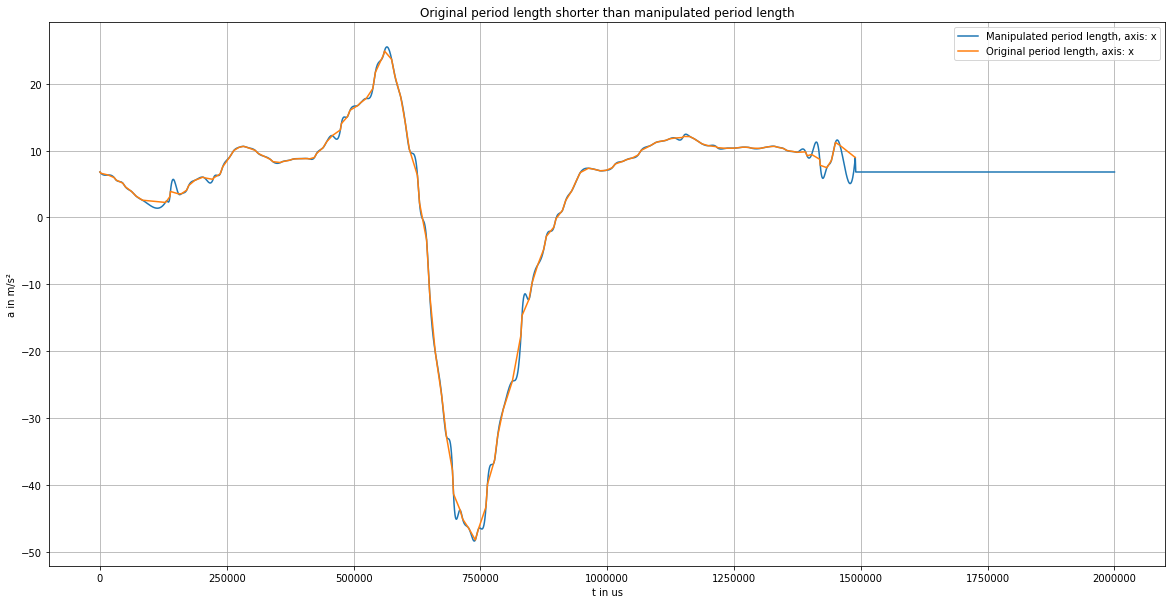

In [10]:
timeseries_plotter.universal_plotter_for_single_axis(data_to_plot,axis_to_plot,legend_titles_to_plot,plot_title=plot_title,y_axis_label=plot_y_label,x_axis_label=plot_x_label,saveImage=True,imageName="originalperiodShorterThanManipulated")

## 2. Original period length > manipulated period length

In that case, the manipulator function cuts the half of the time difference from the first (start) values and the other half from the last (end) values of the original data points.

See the example below:
 - Original period length = 1489000 us (orange graph)
 - Manipulated period length = 1000000 us (blue graph)

In [11]:
# variables and manipulation process
periodLengthMS = 1000 # Set period length to 1000 ms
sampleRateUS = 1000     # set sampling rate to 1000µs (1ms)
manipulated_dataset = standardizer.normate_dataset_period(periodLengthMS, sampleRateUS,smaller_dataset)

Starting new normalization/interpolation...


In [12]:
# define the parameters to plot (read the plotting tutorial for more detailed informations)
data_to_plot = [manipulated_dataset[0],smaller_dataset[0]]
axis_to_plot = ['x','x']
legend_titles_to_plot = ['Manipulated period length, axis: x','Original period length, axis: x']
plot_title = 'Original period length longer than manipulated period length'
plot_x_label = 't in us'
plot_y_label = 'a in m/s²'

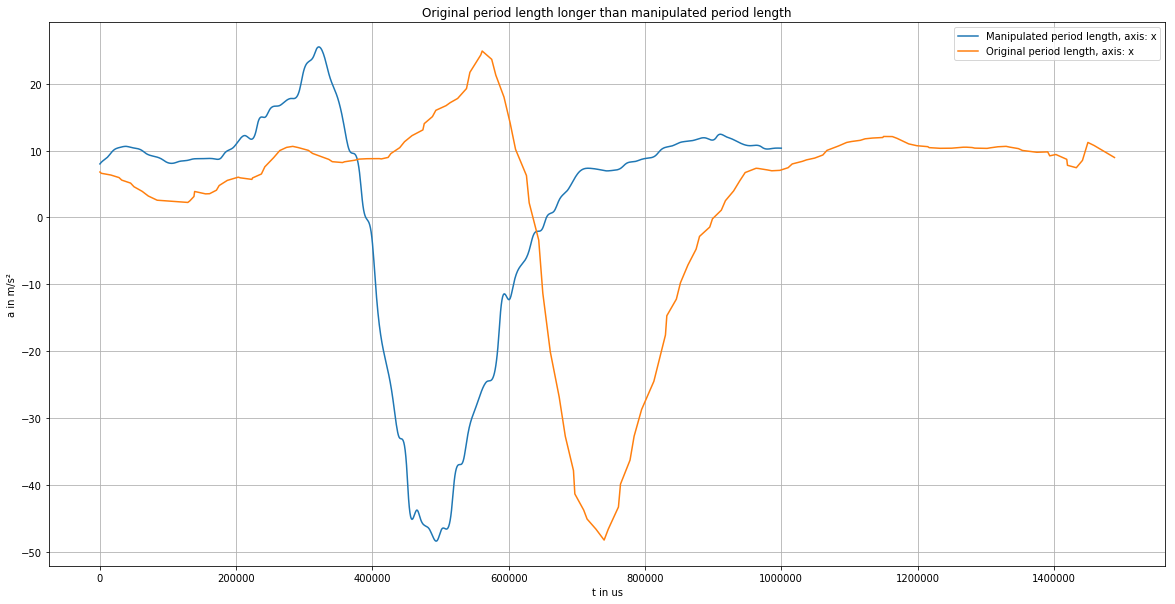

In [13]:
timeseries_plotter.universal_plotter_for_single_axis(data_to_plot,axis_to_plot,legend_titles_to_plot,plot_title=plot_title,y_axis_label=plot_y_label,x_axis_label=plot_x_label,saveImage=True,imageName="originalperiodLongerThanManipulated")

<hr>

# Chapter 5: Plot punch data with different sampling rates

The following plot shows the same punch data but manipulated with different sampling rates.

## Note 1: There are two situations:
1. Original sampling rate > Manipulated sampling rate
2. Original sampling rate < Manipulated sampling rate

## Note 2: The original sampling interval
 The original punch data was measured without a fix sampling rate. The setting "SENSOR_DELAY_FASTEST" of android.hardware.SensorManager was used. This means that the sensor data is measured as soon as possible - but without a garantied fix value.
 See Android Developer site for deeper informations on that: https://developer.android.com/reference/android/hardware/SensorManager.html#SENSOR_DELAY_FASTEST
 
 See the descriptions of both situations below

## 1. Original sampling rate > Manipulated sampling rate
The average sampling rate was calculated to round about 10ms (100Hz).
Lets see the difference between a plot with the (unregular) original sampling rates  and a smaller sampling rate of only 1ms

See the example below:
 - Original sampling rate  ~10ms (orange graph)
 - Manipulated sampling rate = 1ms (blue graph)

In [14]:
# variables and manipulation process
periodLengthMS = 1489 # Set period length to be ~equal to original length
sampleRateUS = 1000     # set sampling rate to 1000µs (1ms)
manipulated_dataset = standardizer.normate_dataset_period(periodLengthMS, sampleRateUS,smaller_dataset)

Starting new normalization/interpolation...


In [15]:
# define the parameters to plot (read the plotting tutorial for more detailed informations)
data_to_plot = [manipulated_dataset[0],smaller_dataset[0]]
axis_to_plot = ['x','x']
legend_titles_to_plot = ['Manipulated sampling rate: 1ms, axis: x','Original sampling rate: ~10ms, axis: x']
plot_title = 'Original sampling rate longer than manipulated sampling rate'
plot_x_label = 't in us'
plot_y_label = 'a in m/s²'

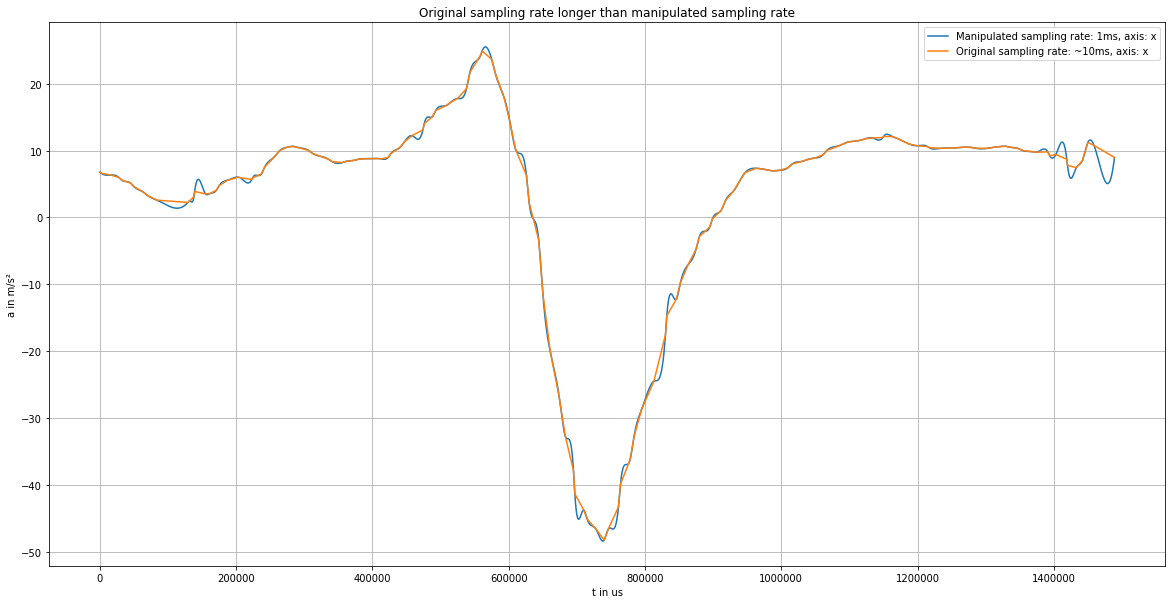

In [16]:
timeseries_plotter.universal_plotter_for_single_axis(data_to_plot,axis_to_plot,legend_titles_to_plot,plot_title=plot_title,y_axis_label=plot_y_label,x_axis_label=plot_x_label,saveImage=True,imageName="originalsampleRateSlowerThanManipulated")

## 2. Original sampling rate < Manipulated sampling rate
The average sampling rate was calculated to round about 10ms (100Hz).
Lets see the difference between a plot with the (unregular) original sampling rates  and a lower sampling rate of only 100ms

See the example below:
 - Original sampling rate  ~10ms (orange graph)
 - Manipulated sampling rate = 100ms (blue graph)

In [17]:
# variables and manipulation process
periodLengthMS = 1489 # Set period length to be ~equal to original length
sampleRateUS = 100000     # set sampling rate to 100000µs (100ms)
manipulated_dataset = standardizer.normate_dataset_period(periodLengthMS, sampleRateUS,smaller_dataset)

Starting new normalization/interpolation...


In [18]:
# define the parameters to plot (read the plotting tutorial for more detailed informations)
data_to_plot = [manipulated_dataset[0],smaller_dataset[0]]
axis_to_plot = ['x','x']
legend_titles_to_plot = ['Manipulated sampling rate: 100ms, axis: x','Original sampling rate: ~10ms, axis: x']
plot_title = 'Original sampling rate shorter than manipulated sampling rate'
plot_x_label = 't in us'
plot_y_label = 'a in m/s²'

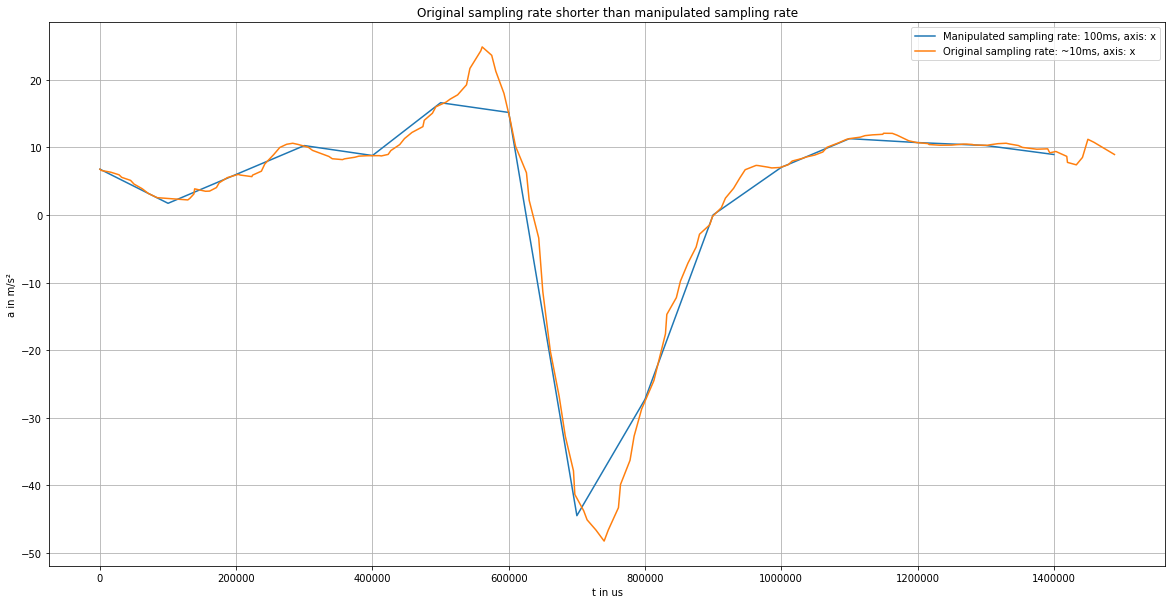

In [19]:
timeseries_plotter.universal_plotter_for_single_axis(data_to_plot,axis_to_plot,legend_titles_to_plot,plot_title=plot_title,y_axis_label=plot_y_label,x_axis_label=plot_x_label,saveImage=True,imageName="originalsampleRateFasterThanManipulated")

# End of this lecture: What you should keep in mind
As you can see, a slower sampling frequency causes the interpolation function to fitt  not as good as it could fit with a higher sampling frequency. But a lower sampling frequency does not need as much memory on disk and needs less computation time while model creation. There is a middle way to find between a sampling frequency fitting good to the natural punch data but not to be unnessesary fine-tuned. The same for the period length. Try to create a model with different period length of data - you will see that there is no need to use the original period length to create a well fitting model - but if the period length is to short you will cut off significant data points so that the model cannot predict well. Check it out and enjoy coding :-)